# Importação de bibliotecas e arquivos

In [17]:
# Importando bibliotecas pandas, seaborn, matplotlib, numpy, os, cufflinks e plotly
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
# importando o arquivo
oscar_winners = pd.read_csv('Oscars-demographics-DFE.csv', encoding='latin-1', sep = ',')
oscar_winners.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,...,award,biourl,birthplace_gold,date_of_birth_gold,movie,person,race_ethnicity_gold,religion_gold,sexual_orientation_gold,year_of_award_gold
0,670454353,False,finalized,3,2/10/15 3:45,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,Two Arabian Knights,Lewis Milestone,NaN,NaN,NaN,NaN
1,670454354,False,finalized,3,2/10/15 2:03,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,White,...,Best Director,http://www.nndb.com/people/626/000042500/,NaN,NaN,The Divine Lady,Frank Lloyd,NaN,NaN,NaN,NaN
2,670454355,False,finalized,3,2/10/15 2:05,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,All Quiet on the Western Front,Lewis Milestone,NaN,NaN,NaN,NaN
3,670454356,False,finalized,3,2/10/15 2:04,"Chicago, Il",1.0,23-Feb-1899,1.0,White,...,Best Director,http://www.nndb.com/people/544/000041421/,NaN,NaN,Skippy,Norman Taurog,NaN,NaN,NaN,NaN
4,670454357,False,finalized,3,2/10/15 1:48,"Salt Lake City, Ut",1.0,23-Apr-1894,1.0,White,...,Best Director,http://www.nndb.com/people/292/000044160/,NaN,NaN,Bad Girl,Frank Borzage,NaN,NaN,NaN,NaN


# Tratativas gerais

In [3]:
# verificando a quantidade de linhas e colunas

oscar_winners.shape

(441, 27)

In [4]:
# removendo duplicatas e verificando a quantidade

oscar_winners = oscar_winners.drop_duplicates()

oscar_winners.shape

(441, 27)

Ótimo, neste caso não há duplicatas na base!

In [5]:
# verificando a quantidade de valores nulos existem na base

oscar_winners.isnull().sum()

_unit_id                           0
_golden                            0
_unit_state                        0
_trusted_judgments                 0
_last_judgment_at                 25
birthplace                         0
birthplace:confidence              0
date_of_birth                      0
date_of_birth:confidence           0
race_ethnicity                     0
race_ethnicity:confidence          0
religion                           0
religion:confidence                0
sexual_orientation                 0
sexual_orientation:confidence      0
year_of_award                      0
year_of_award:confidence           0
award                              0
biourl                             0
birthplace_gold                  432
date_of_birth_gold               433
movie                              0
person                             0
race_ethnicity_gold              439
religion_gold                    431
sexual_orientation_gold          438
year_of_award_gold               430
d

In [6]:
# criando colunas para marcar colunas que tinham valores nulos
oscar_winners['last_judgement_at_nulls'] = np.where(oscar_winners['_last_judgment_at'].isnull(), 'null', 'n/a')
oscar_winners['birthplace_gold_nulls'] = np.where(oscar_winners['birthplace_gold'].isnull(), 'null', 'n/a')
oscar_winners['date_of_birth_gold_nulls'] = np.where(oscar_winners['date_of_birth_gold'].isnull(), 'null', 'n/a')
oscar_winners['race_ethnicity_gold_nulls'] = np.where(oscar_winners['race_ethnicity'].isnull(), 'null', 'n/a')
oscar_winners['religion_gold_nulls'] = np.where(oscar_winners['religion_gold'].isnull(), 'null', 'n/a')
oscar_winners['sexual_orientation_gold_nulls'] = np.where(oscar_winners['sexual_orientation_gold'].isnull(), 'null', 'n/a')
oscar_winners['year_of_award_gold_nulls'] = np.where(oscar_winners['year_of_award_gold'].isnull(), 'null', 'n/a')

# verificando a base

oscar_winners.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,...,religion_gold,sexual_orientation_gold,year_of_award_gold,last_judgement_at_nulls,birthplace_gold_nulls,date_of_birth_gold_nulls,race_ethnicity_gold_nulls,religion_gold_nulls,sexual_orientation_gold_nulls,year_of_award_gold_nulls
0,670454353,False,finalized,3,2/10/15 3:45,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,NaN,NaN,NaN,n/a,null,null,n/a,null,null,null
1,670454354,False,finalized,3,2/10/15 2:03,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,White,...,NaN,NaN,NaN,n/a,null,null,n/a,null,null,null
2,670454355,False,finalized,3,2/10/15 2:05,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,NaN,NaN,NaN,n/a,null,null,n/a,null,null,null
3,670454356,False,finalized,3,2/10/15 2:04,"Chicago, Il",1.0,23-Feb-1899,1.0,White,...,NaN,NaN,NaN,n/a,null,null,n/a,null,null,null
4,670454357,False,finalized,3,2/10/15 1:48,"Salt Lake City, Ut",1.0,23-Apr-1894,1.0,White,...,NaN,NaN,NaN,n/a,null,null,n/a,null,null,null


In [7]:
# substituindo os valores nulos
# as colunas last judgement, date of birth, year of award serão substituídas por 0
# as demais colunas serão substituídas por "N/A"

oscar_winners['_last_judgment_at'] = oscar_winners['_last_judgment_at'].fillna(0)
oscar_winners['date_of_birth_gold'] = oscar_winners['date_of_birth_gold'].fillna(0)
oscar_winners['year_of_award_gold'] = oscar_winners['year_of_award_gold'].fillna(0)
oscar_winners['birthplace_gold'] = oscar_winners['birthplace_gold'].fillna('Na')
oscar_winners['race_ethnicity_gold'] = oscar_winners['race_ethnicity_gold'].fillna('Na')
oscar_winners['religion_gold'] = oscar_winners['religion_gold'].fillna('Na')
oscar_winners['sexual_orientation_gold'] = oscar_winners['sexual_orientation_gold'].fillna('Na')

In [8]:
# verificando se realmente todas as células nulas foram preenchidas

oscar_winners.isnull().sum()

_unit_id                         0
_golden                          0
_unit_state                      0
_trusted_judgments               0
_last_judgment_at                0
birthplace                       0
birthplace:confidence            0
date_of_birth                    0
date_of_birth:confidence         0
race_ethnicity                   0
race_ethnicity:confidence        0
religion                         0
religion:confidence              0
sexual_orientation               0
sexual_orientation:confidence    0
year_of_award                    0
year_of_award:confidence         0
award                            0
biourl                           0
birthplace_gold                  0
date_of_birth_gold               0
movie                            0
person                           0
race_ethnicity_gold              0
religion_gold                    0
sexual_orientation_gold          0
year_of_award_gold               0
last_judgement_at_nulls          0
birthplace_gold_null

In [9]:
# colocando ambas as colunas last judgment at e date of birth em formato de data

oscar_winners['_last_judgment_at'] = pd.to_datetime(oscar_winners['_last_judgment_at'])
oscar_winners['date_of_birth_gold'] = pd.to_datetime(oscar_winners['date_of_birth_gold'])

# verificando se o ajuste foi bem sucedido

oscar_winners.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,...,religion_gold,sexual_orientation_gold,year_of_award_gold,last_judgement_at_nulls,birthplace_gold_nulls,date_of_birth_gold_nulls,race_ethnicity_gold_nulls,religion_gold_nulls,sexual_orientation_gold_nulls,year_of_award_gold_nulls
0,670454353,False,finalized,3,2015-02-10 03:45:00,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Na,Na,0.0,n/a,null,null,n/a,null,null,null
1,670454354,False,finalized,3,2015-02-10 02:03:00,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,White,...,Na,Na,0.0,n/a,null,null,n/a,null,null,null
2,670454355,False,finalized,3,2015-02-10 02:05:00,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Na,Na,0.0,n/a,null,null,n/a,null,null,null
3,670454356,False,finalized,3,2015-02-10 02:04:00,"Chicago, Il",1.0,23-Feb-1899,1.0,White,...,Na,Na,0.0,n/a,null,null,n/a,null,null,null
4,670454357,False,finalized,3,2015-02-10 01:48:00,"Salt Lake City, Ut",1.0,23-Apr-1894,1.0,White,...,Na,Na,0.0,n/a,null,null,n/a,null,null,null


In [10]:
# renomeando colunas

oscar_winners = oscar_winners.rename(columns = {'_unit_id': 'unit_id', '_golden' :'golden', '_unit_state': 'unit_state', '_trusted_judgments' : 'trusted_judments', '_last_judgement_at' : 'last_judgement'})

# verificando se a nova nomenclatura está de acordo com o definido

oscar_winners.head()

,unit_id,golden,unit_state,trusted_judments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,...,religion_gold,sexual_orientation_gold,year_of_award_gold,last_judgement_at_nulls,birthplace_gold_nulls,date_of_birth_gold_nulls,race_ethnicity_gold_nulls,religion_gold_nulls,sexual_orientation_gold_nulls,year_of_award_gold_nulls
0,670454353,False,finalized,3,2015-02-10 03:45:00,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Na,Na,0.0,n/a,null,null,n/a,null,null,null
1,670454354,False,finalized,3,2015-02-10 02:03:00,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,White,...,Na,Na,0.0,n/a,null,null,n/a,null,null,null
2,670454355,False,finalized,3,2015-02-10 02:05:00,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Na,Na,0.0,n/a,null,null,n/a,null,null,null
3,670454356,False,finalized,3,2015-02-10 02:04:00,"Chicago, Il",1.0,23-Feb-1899,1.0,White,...,Na,Na,0.0,n/a,null,null,n/a,null,null,null
4,670454357,False,finalized,3,2015-02-10 01:48:00,"Salt Lake City, Ut",1.0,23-Apr-1894,1.0,White,...,Na,Na,0.0,n/a,null,null,n/a,null,null,null


# Exportação da base tratada

In [11]:
# exportando a base tratada em csv

oscar_winners.to_excel(r'oscar_winners.xlsx')

# Análises gráficas

Utilizar o gráfico de barras do matplotlib, pandas, seaborn e do cufflinks para verificar a quantidade de ganhadores por raças que ganhou o Oscar, a quantidade de ganhaddores por orientação sexual

In [12]:
# preparação da variável que irá contar quantos ganhadores de melhor ator por raça existem

count_race = oscar_winners['race_ethnicity'].value_counts()
count_race

White             411
Black              15
Hispanic            8
Asian               4
Multiracial         2
Middle Eastern      1
Name: race_ethnicity, dtype: int64

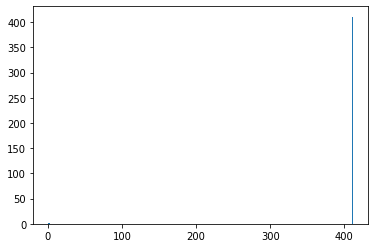

In [21]:
# gráfico de barras do matplotlib para analisar quantos ganhadores de melhor ator por raça existem

_ = plt.bar(count_race.unique(), count_race)
plt.show()

In [13]:
# preparação de variável que irá contar quantos ganhadores de melhor ator por orientação sexual existem

count_sexual_orientation = oscar_winners['sexual_orientation_gold'].value_counts()
count_sexual_orientation

Na          438
Straight      2
Bisexual      1
Name: sexual_orientation_gold, dtype: int64

In [14]:
# preparação da variável que irá contar quantos ganhadores de melhor ator por local de nascimento existem

count_birthplace = oscar_winners['birthplace'].value_counts()
count_birthplace

New York City                     35
London, England                   24
Los Angeles, Ca                   16
Chicago, Il                       13
Brooklyn, Ny                       9
                                  ..
Grayshott, Hampshire, England      1
Morristown, Nj                     1
Lawrence, Ks                       1
York, North Yorkshire, England     1
Terrell, Tx                        1
Name: birthplace, Length: 233, dtype: int64

In [15]:
# preparação da variável que irá contar quantos ganhadores de melhor ator por religião existem

count_religion = oscar_winners['religion_gold'].value_counts()
count_religion

Na                      434
Jewish                    3
Roman Catholic            2
Born-Again Christian      1
Buddhist                  1
Name: religion_gold, dtype: int64